<a href="https://colab.research.google.com/github/valeryongso22/ml-trashcare/blob/main/TrashCare_User.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow

     -------------------------------------- 272.8/272.8 MB 2.7 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 3.9 MB/s eta 0:00:00
     ---------------------------------------- 5.6/5.6 MB 3.5 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 4.1 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 3.5 MB/s eta 0:00:00
     ---------------------------------------- 4.1/4.1 MB 3.4 MB/s eta 0:00:00
     -------------------------------------- 126.5/126.5 kB 3.8 MB/s eta 0:00:00
     ---------------------------------------- 24.4/24.4 MB 4.3 MB/s eta 0:00:00
     ---------------------------------------- 1.3/1.3 MB 2.2 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pypro

In [ ]:
import pathlib
import PIL
import tensorflow as tf
import matplotlib.pyplot as plt
import glob
import zipfile

In [ ]:
files = glob.glob('./*.zip')
files

['.\\trash.zip']

In [ ]:
for file in files:
    print('Unzipping:',file)

    with zipfile.ZipFile(file, 'r') as zip_ref:
        zip_ref.extractall('./trash-images')

Unzipping: .\trash.zip


In [ ]:
data_dir = pathlib.Path("./trash-images")
data_dir

WindowsPath('trash-images')

In [ ]:
image_count = len(list(data_dir.glob("*/*.jpg")))
image_count

2527

trash-images\cardboard\cardboard1.jpg


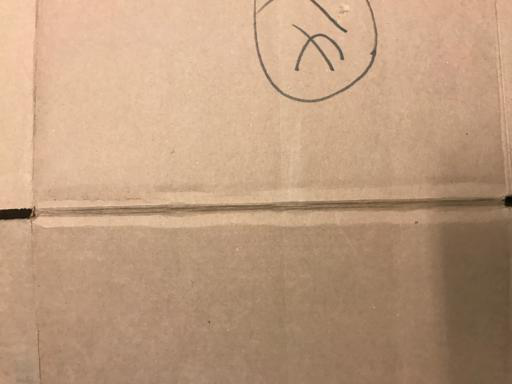

In [ ]:
cardboard = list(data_dir.glob("cardboard/*"))
print(str(cardboard[0]))
PIL.Image.open(str(cardboard[0]))

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=2023_06_02,
  image_size=(img_height, img_width),
  batch_size=batch_size)

validation_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=2023_06_02,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names
print(class_names)

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_ds = validation_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 2527 files belonging to 6 classes.
Using 2022 files for training.
Found 2527 files belonging to 6 classes.
Using 505 files for validation.
['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


## Train the model

In [ ]:
def create_model():
  model = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(img_width, img_height, 3)),
    tf.keras.layers.Conv2D(4, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
  ])


  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])


  model.summary()

  return model

In [ ]:
# Get the untrained model
model = create_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 4)       112       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 4)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        2368      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       7

In [ ]:
# Train the model
# Note that this may take some time.
epochs=50
history = model.fit(train_ds,
                    epochs=epochs,
                    verbose=1,
                    validation_data=validation_ds)


Epoch 1/50
64/64 [==============================] - 43s 600ms/step - loss: 1.7674 - accuracy: 0.2250 - val_loss: 1.5546 - val_accuracy: 0.3287
Epoch 2/50
64/64 [==============================] - 39s 612ms/step - loss: 1.5594 - accuracy: 0.3521 - val_loss: 1.4259 - val_accuracy: 0.4178
Epoch 3/50
64/64 [==============================] - 40s 621ms/step - loss: 1.4276 - accuracy: 0.4308 - val_loss: 1.3811 - val_accuracy: 0.4653
Epoch 4/50
64/64 [==============================] - 38s 597ms/step - loss: 1.2716 - accuracy: 0.5064 - val_loss: 1.2038 - val_accuracy: 0.5663
Epoch 5/50
64/64 [==============================] - 38s 598ms/step - loss: 1.1630 - accuracy: 0.5737 - val_loss: 1.4209 - val_accuracy: 0.5307
Epoch 6/50
64/64 [==============================] - 39s 605ms/step - loss: 0.9884 - accuracy: 0.6306 - val_loss: 1.1171 - val_accuracy: 0.6020
Epoch 7/50
64/64 [==============================] - 39s 610ms/step - loss: 0.8279 - accuracy: 0.6924 - val_loss: 1.0865 - val_accuracy: 0.6416

In [ ]:
export_dir = 'saved_model/1'

tf.saved_model.save(model, export_dir)

INFO:tensorflow:Assets written to: saved_model/1\assets


INFO:tensorflow:Assets written to: saved_model/1\assets


In [ ]:
mode = "Speed"

if mode == 'Storage':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_SIZE
elif mode == 'Speed':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_LATENCY
else:
    optimization = tf.lite.Optimize.DEFAULT

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)

# Set the optimzations
converter.optimizations = [optimization]

# Invoke the converter to finally generate the TFLite model
tflite_model = converter.convert()

In [ ]:
tflite_model_file = pathlib.Path('./model.tflite')
tflite_model_file.write_bytes(tflite_model)

5547680